In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import math
import librosa
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [ ]:
data = pd.read_csv("physioNet.csv")
data = data.drop(columns=["Unnamed: 0"])

print(data["Label"].value_counts())

data = data.sort_values(by='Label', ascending=False)
data = data.tail(data.shape[0]-5000)

print(data["Label"].value_counts())
print(data.shape)


normal      12827
abnormal     3922
Name: Label, dtype: int64
normal      7827
abnormal    3922
Name: Label, dtype: int64
(11749, 26)


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# sel = VarianceThreshold(threshold = (.7 * (1 - .7)))
# sel.fit(X)
# sel.transform(X)
# print(sel)
# y[0] = 'murmur'
# for index in range(len(y)):
#   if y[index] == 'extrasystole':
#     y[index] = 'murmur'

# print(np.var(X,axis = 0))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,shuffle=True)
# pca = PCA(n_components= 0.99)"
# principal_x = pca.fit_transform(X_train)
# principal_y = pca.transform(X_test)
# print(principal_x.shape)
# print(principal_y.shape)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)


In [ ]:
# SVC GridSearchCV
parameters = {'kernel' : ('linear','poly', 'rbf'), 'C':np.arange(40,51)}
svc = svm.SVC()
clf_svm = GridSearchCV(svc, parameters,scoring ="f1_macro")
clf_svm.fit(X_train,y_train)
print(clf_svm.best_params_)

{'C': 50, 'kernel': 'rbf'}


Training score = 0.9178299852457156
Testing score  = 0.8975493533015657
F1 score = 0.8878750360558255


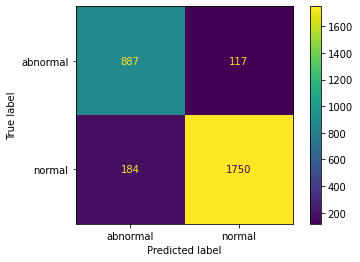

In [ ]:
# SVC Classifier
svc = svm.SVC(kernel ='rbf', C=50)
svc.fit(X_train,y_train)
print(f"Training score = {svc.score(X_train,y_train)}")
print(f"Testing score  = {svc.score(X_test,y_test)}")
predictions = svc.predict(X_test)
print(f"F1 score = {f1_score(y_test,predictions,average = 'macro')}")
metrics.ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test) 
plt.show()

# New Section

In [ ]:
# RFC GridSearchCV
rfc = RandomForestClassifier()
forest_params = [{'n_estimators':list(range(0, 1000,10)),'max_depth': list(range(3, 15))}]
clf_rfc = GridSearchCV(rfc, forest_params, cv = 10, scoring='f1_macro')
clf_rfc.fit(X_train, y_train)
print(clf_rfc.best_params_)


F1 score = 0.868824531516184


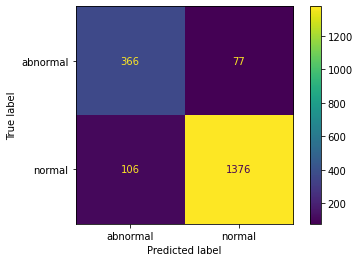

In [ ]:
# RFC Classifier
rfc = RandomForestClassifier(n_estimators=800, max_depth=6, random_state=0)
rfc.fit(X_train[],y_train)
predictions = rfc.predict(X_test)
print(f"F1 score = {f1_score(y_test,predictions,average = 'macro')}")
# print(f"Testing score  = {rfc.score(X_test,y_test)}")
metrics.ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test) 
plt.show()


In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)
f1_score(y_test, preds)

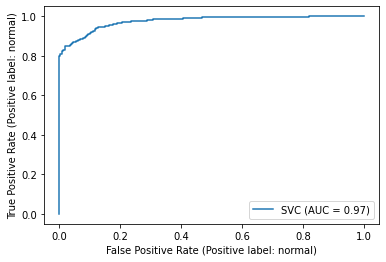

In [ ]:
from sklearn import datasets, metrics, model_selection, svm
metrics.RocCurveDisplay.from_estimator(svc, X_test, y_test)

plt.show()

(252,) (252,)
Accuracy score = 0.6944444444444444
F1 score = 0.5764705882352941


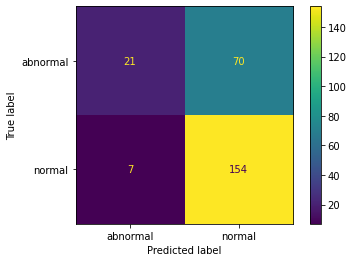

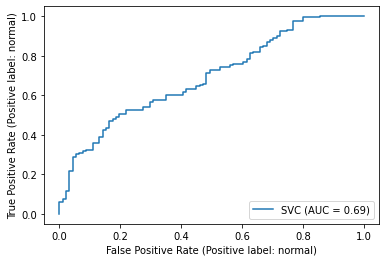

In [ ]:
pascal_df = pd.read_csv("data.csv")
pascal_df = pascal_df.drop(columns=["Unnamed: 0"])

pascal_X = pascal_df.iloc[:,:-1]
pascal_y = pascal_df.iloc[:,-1]

pascal_y = pascal_y.replace({'murmur': "abnormal", 'extrasystole': "normal"})
pascal_X = MinMaxScaler().fit_transform(pascal_X)

pascal_predicts = svc.predict(pascal_X)
metrics.ConfusionMatrixDisplay.from_estimator(svc, pascal_X, pascal_y) 

print(pascal_y.shape, pascal_predicts.shape)
print(f"Accuracy score = {metrics.accuracy_score(pascal_y, pascal_predicts)}")
print(f"F1 score = {f1_score(pascal_y, pascal_predicts, average = 'macro')}")
metrics.RocCurveDisplay.from_estimator(svc, pascal_X, pascal_y)



In [ ]:
len(y_test[y_test == 'abnormal']) / len(y_test)

0.23012987012987013

115